In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,11)
from IPython.display import display, HTML

#original data from http://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page27.jspx?indicator=EAR_4MTH_SEX_OCU_CUR_NB&subject=EAR&datasetCode=A&collectionCode=YI&_adf.ctrl-state=d9h8of9o1_4&_afrLoop=709921039136290&_afrWindowMode=0&_afrWindowId=null#!%40%40%3Findicator%3DEAR_4MTH_SEX_OCU_CUR_NB%26_afrWindowId%3Dnull%26subject%3DEAR%26_afrLoop%3D709921039136290%26datasetCode%3DA%26collectionCode%3DYI%26_afrWindowMode%3D0%26_adf.ctrl-state%3Di743j8tal_4
#import df with ILO data on mean salaries, divided by occupation type
ILO = (pd.read_csv('Mean_occupation_sex_ILO.csv',index_col=0,delimiter=";",engine="python"))
ILO.index=ILO.index.rename("Country")
ILO.head()#data missing for Croatia and Lithuania


,Sex,Occupation,Currency,Survey,Type of Source,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,
Austria,Male (Sex),1. Managers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,7336.0,NaN,NaN,NaN,8144.0,NaN,NaN,NaN
Austria,Male (Sex),2. Professionals (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,5030.0,NaN,NaN,NaN,5560.0,NaN,NaN,NaN
Austria,Male (Sex),3. Technicians and associate professionals (IS...,Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,4125.0,NaN,NaN,NaN,4495.0,NaN,NaN,NaN
Austria,Male (Sex),4. Clerical support workers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,3309.0,NaN,NaN,NaN,3607.0,NaN,NaN,NaN
Austria,Male (Sex),5. Service and sales workers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,2448.0,NaN,NaN,NaN,2651.0,NaN,NaN,NaN


In [2]:
#select the most recent year for each country (there must me a better way but couldnt find it)

index2017=(ILO[ILO["2017"].notna()].index.unique())

index2016=ILO[ILO["2016"].notna()].index.unique()
index2016=index2016[~index2016.isin(index2017)]

index2015=ILO[ILO["2015"].notna()].index.unique()
index2015=index2015[~index2015.isin(index2017 | index2016)]

index2014=ILO[ILO["2014"].notna()].index.unique()
index2014=index2014[~index2014.isin(index2017 | index2016 | index2015)]

index2013=ILO[ILO["2013"].notna()].index.unique()
index2013=index2013[~index2013.isin(index2017 | index2016 | index2015 | index2014)]


display(index2017)
display(index2016)
display(index2015)
display(index2014)
display(index2013)


Index(['United Kingdom'], dtype='object', name='Country')

Index(['Czech Republic', 'Greece', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia'],
      dtype='object', name='Country')

Index(['Austria', 'Belgium', 'Finland', 'Hungary', 'Spain'], dtype='object', name='Country')

Index(['Bulgaria', 'Cyprus', 'Denmark', 'Estonia', 'France', 'Germany',
       'Ireland', 'Italy', 'Latvia', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Sweden'],
      dtype='object', name='Country')

Index([], dtype='object', name='Country')

In [3]:
#get rid of columns we don't need
ILO=ILO.drop(columns=["2010","2011","2012","2013"])


In [4]:
#select the country based on the years identified above
ILO2017=ILO[ILO.index.get_level_values(0).isin(index2017)].drop(columns=["2014","2015","2016"]).dropna()
ILO2016=ILO[ILO.index.get_level_values(0).isin(index2016)].drop(columns=["2014","2015","2017"]).dropna()
ILO2015=ILO[ILO.index.get_level_values(0).isin(index2015)].drop(columns=["2014","2016","2017"]).dropna()
ILO2014=ILO[ILO.index.get_level_values(0).isin(index2014)].drop(columns=["2015","2016","2017"]).dropna()


In [5]:
#Rename the columns, re-unify the df in a single one 
ILO2017["Year"]="2017"
ILO2017=ILO2017.rename(index=str, columns={"2017": "Mean"})

ILO2016["Year"]="2016"
ILO2016=ILO2016.rename(index=str, columns={"2016": "Mean"})

ILO2015["Year"]="2015"
ILO2015=ILO2015.rename(index=str, columns={"2015": "Mean"})

ILO2014["Year"]="2014"
ILO2014=ILO2014.rename(index=str, columns={"2014": "Mean"})

frames=[ILO2017,ILO2016,ILO2015,ILO2014]
ILObis=pd.concat(frames,axis=0)
ILObis

,Sex,Occupation,Currency,Survey,Type of Source,Mean,Year
Country,,,,,,,
United Kingdom,Male (Sex),1. Managers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,6003.0,2017
United Kingdom,Male (Sex),2. Professionals (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,4832.0,2017
United Kingdom,Male (Sex),3. Technicians and associate professionals (IS...,Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,3643.0,2017
United Kingdom,Male (Sex),4. Clerical support workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2470.0,2017
United Kingdom,Male (Sex),5. Service and sales workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2302.0,2017
United Kingdom,Male (Sex),"6. Skilled agricultural, forestry and fishery ...",Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2206.0,2017
United Kingdom,Male (Sex),7. Craft and related trades workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,3143.0,2017
United Kingdom,Male (Sex),"8. Plant and machine operators, and assemblers...",Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2738.0,2017
United Kingdom,Male (Sex),9. Elementary occupations (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,1943.0,2017


In [6]:
#import the OECD data with gap as difference with median salaries. change country codes, select most recent year, keep only relevant data in final DF

gapOECD=(pd.read_csv('GapOECD.csv', delimiter=";"))

ListEU= {"AUT":"Austria","BEL" : "Belgium", "BGR" : "Bulgaria", "CYP":"Cyprus","CZE":"Czech Republic","DEU":"Germany","DNK":"Denmark","ESP":"Spain","EST":"Estonia","FIN":"Finland","FRA":"France","GBR":"United Kingdom","GRC":"Greece","HUN":"Hungary","IRL":"Irleand","ITA":"Italy","LTU":"Lithuania","LUX":"Luxembourg","LVA":"Latvia","MLT":"Malta","NLD":"Neatherlands","POL":"Poland","PRT":"Portugal","ROU":"Romania","SVK":"Slovakia","SVN":"Slovenia","SWE":"Sweden"}
gapOECD['Country'] = gapOECD["LOCATION"].map(ListEU)
gapOECD=(gapOECD.sort_values(['Country', 'TIME'], ascending=[True, False]).drop_duplicates(['Country']).set_index(["Country"]))
gapOECD = gapOECD.rename(columns={'Value': 'MedianSalGap'})
gapOECDmini=gapOECD[["MedianSalGap"]]
gapOECDmini

,MedianSalGap
Country,
Austria,15.670900
Belgium,4.672000
Bulgaria,4.062500
Cyprus,13.409235
Czech Republic,15.614011
Denmark,5.732628
Estonia,28.339350
Finland,16.472258
France,9.872102


In [7]:
#back to ILO database. reset the index, pivot it to maintain only the data relevant and have data in two columns for gender
ILObis=ILObis.reset_index()
ILObis2 = pd.pivot_table(ILObis, index=['Country','Occupation'], columns='Sex', values='Mean')

In [8]:
#create ratio between mean female and male salary

ILObis2["ratioMeanWage"]=ILObis2["Female (Sex)"]/ILObis2["Male (Sex)"] 
display(ILObis2)

Sex                                                                Female (Sex)  \
Country        Occupation                                                         
Austria        1. Managers (ISCO-08)                                     5556.0   
               2. Professionals (ISCO-08)                                3925.0   
               3. Technicians and associate professionals (ISC...        3028.0   
               4. Clerical support workers (ISCO-08)                     2610.0   
               5. Service and sales workers (ISCO-08)                    1674.0   
               6. Skilled agricultural, forestry and fishery w...        1441.0   
               7. Craft and related trades workers (ISCO-08)             2101.0   
               8. Plant and machine operators, and assemblers ...        2207.0   
               9. Elementary occupations (ISCO-08)                       1433.0   
               TOTAL. Total (ISCO-08)                                    2531.0   
Belgium        1. Managers (ISCO-08)                                     7226.0   
               2. Professionals (ISCO-08)                                5081.0   
               3. Technicians and associate professionals (ISC...        3873.0   
               4. Clerical support workers (ISCO-08)                     3279.0   
               5. Service and sales workers (ISCO-08)                    2118.0   
               7. Craft and related trades workers (ISCO-08)             2839.0   
               8. Plant and machine operators, and assemblers ...        2930.0   
               9. Elementary occupations (ISCO-08)                       1874.0   
               TOTAL. Total (ISCO-08)                                    3286.0   
Bulgaria       1. Managers (ISCO-08)                                     2771.0   
               2. Professionals (ISCO-08)                                1591.0   
               3. Technicians and associate professionals (ISC...        1497.0   
               4. Clerical support workers (ISCO-08)                     1048.0   
               5. Service and sales workers (ISCO-08)                     789.0   
               6. Skilled agricultural, forestry and fishery w...        2443.0   
               7. Craft and related trades workers (ISCO-08)              830.0   
               8. Plant and machine operators, and assemblers ...         857.0   
               9. Elementary occupations (ISCO-08)                        702.0   
               TOTAL. Total (ISCO-08)                                    1168.0   
Cyprus         1. Managers (ISCO-08)                                     5426.0   
...                                                                         ...   
Spain          1. Managers (ISCO-08)                                     5399.0   
               2. Professionals (ISCO-08)                                3980.0   
               3. Technicians and associate professionals (ISC...        2993.0   
               4. Clerical support workers (ISCO-08)                     2473.0   
               5. Service and sales workers (ISCO-08)                    1714.0   
               6. Skilled agricultural, forestry and fishery w...        1987.0   
               7. Craft and related trades workers (ISCO-08)             1951.0   
               8. Plant and machine operators, and assemblers ...        2275.0   
               9. Elementary occupations (ISCO-08)                       1320.0   
               TOTAL. Total (ISCO-08)                                    2463.0   
Sweden         1. Managers (ISCO-08)                                     5590.0   
               2. Professionals (ISCO-08)                                3899.0   
               3. Technicians and associate professionals (ISC...        3620.0   
               4. Clerical support workers (ISCO-08)                     3150.0   
               5. Service and sales workers (ISCO-08)                    2919.0   
               6

In [9]:
EUindex=ILObis2.index.get_level_values(0).unique()

In [10]:
#import data on leaves for mothers and fathers. merge in a single DF

MothersOECD = (pd.read_csv('MothersLeaveOECD.csv',index_col=0,delimiter=";",engine="python"))
MothersOECD.index=MothersOECD.index.rename("Country")
MothersOECD=MothersOECD[["Unnamed: 10"]].dropna()
MothersOECD=MothersOECD.rename(index=str, columns={"Unnamed: 10": "MothersTotPaid"})
MothersOECD=MothersOECD[MothersOECD.index.get_level_values(0).isin(EUindex)]
MothersOECD["MothersTotPaid"]=pd.to_numeric(MothersOECD["MothersTotPaid"],errors='coerce')

FathersOECD = (pd.read_csv('FathersLeaveOECD.csv',index_col=0,delimiter=";",engine="python"))
FathersOECD.index=FathersOECD.index.rename("Country")
FathersOECD=FathersOECD[["Unnamed: 10"]].dropna()
FathersOECD=FathersOECD.rename(index=str, columns={"Unnamed: 10": "FathersTotPaid"})
FathersOECD=FathersOECD[FathersOECD.index.get_level_values(0).isin(EUindex)]
FathersOECD["FathersTotPaid"]=pd.to_numeric(FathersOECD["FathersTotPaid"],errors='coerce')


# create the delta between fathers and mothers paid leave to use as indep. variable
LeavesOECD=pd.merge(FathersOECD, MothersOECD, left_index=True, right_index=True)
LeavesOECD["DeltaPaidLeave"]=LeavesOECD["MothersTotPaid"]-LeavesOECD["FathersTotPaid"]
LeavesOECD

,FathersTotPaid,MothersTotPaid,DeltaPaidLeave
Country,,,
Austria,6.9,51.2,44.3
Belgium,5.0,13.1,8.1
Czech Republic,0.0,53.1,53.1
Denmark,1.1,26.8,25.7
Estonia,2.0,85.0,83.0
Finland,5.7,40.6,34.9
France,5.6,18.8,13.2
Germany,5.7,42.6,36.9
Greece,0.4,23.3,22.9


In [11]:
ILObis2=ILObis2.reset_index()
ILObis2=ILObis2.set_index("Country")
ILObis2.index=ILObis2.index.rename("Country")

In [12]:
#merge all the DF in two DF, one with the OECD data (salary gap) and one with ILO data (ration of mean salaries, divided by occupation). 
#ratioMeanWage (ratio between average salaries, per country and occupation, as calculated by ILO) and MedianSalGap (median salary gap as measured by OECD, per country) are dependent variables and parameters for inequality.
#Fathers Tot Paid, Mothers Tot Paid and DeltaPaidLeave are independent variables that measure the leave entitlements of fathers, mothers and the difference between them.

FinalDFILO=pd.merge(ILObis2, LeavesOECD, left_index=True, right_index=True)
FinalDFILO=FinalDFILO.dropna()
display(FinalDFILO)

FinalDFOECD=pd.merge(FinalDFILO,gapOECDmini,left_index=True, right_index=True)
FinalDFOECD=FinalDFOECD.reset_index()
FinalDFOECD=FinalDFOECD.set_index("Country")
FinalDFOECD= FinalDFOECD[~FinalDFOECD.index.duplicated(keep='first')]
FinalDFOECD.drop(columns=["Occupation", "Female (Sex)", "Male (Sex)", "ratioMeanWage"])

,Occupation,Female (Sex),Male (Sex),ratioMeanWage,FathersTotPaid,MothersTotPaid,DeltaPaidLeave
Country,,,,,,,
Austria,1. Managers (ISCO-08),5556.0,9571.0,0.580504,6.9,51.2,44.3
Austria,2. Professionals (ISCO-08),3925.0,5817.0,0.674746,6.9,51.2,44.3
Austria,3. Technicians and associate professionals (IS...,3028.0,4831.0,0.626785,6.9,51.2,44.3
Austria,4. Clerical support workers (ISCO-08),2610.0,3692.0,0.706934,6.9,51.2,44.3
Austria,5. Service and sales workers (ISCO-08),1674.0,2365.0,0.707822,6.9,51.2,44.3
Austria,"6. Skilled agricultural, forestry and fishery ...",1441.0,1762.0,0.817821,6.9,51.2,44.3
Austria,7. Craft and related trades workers (ISCO-08),2101.0,3535.0,0.594342,6.9,51.2,44.3
Austria,"8. Plant and machine operators, and assemblers...",2207.0,3292.0,0.670413,6.9,51.2,44.3
Austria,9. Elementary occupations (ISCO-08),1433.0,2236.0,0.640877,6.9,51.2,44.3


,FathersTotPaid,MothersTotPaid,DeltaPaidLeave,MedianSalGap
Country,,,,
Austria,6.9,51.2,44.3,15.670900
Belgium,5.0,13.1,8.1,4.672000
Bulgaria,1.7,65.5,63.8,4.062500
Cyprus,0.0,13.5,13.5,13.409235
Czech Republic,0.0,53.1,53.1,15.614011
Denmark,1.1,26.8,25.7,5.732628
Estonia,2.0,85.0,83.0,28.339350
Finland,5.7,40.6,34.9,16.472258
France,5.6,18.8,13.2,9.872102


In [13]:
FinalDFILO.to_csv("FinalDFILO.csv")
FinalDFOECD.to_csv("FinalDFOECD.csv")

In [14]:
###########
#data analysis
################
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MedianSalGap   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.346
Date:                Sat, 21 Jul 2018   Prob (F-statistic):             0.0823
Time:                        17:02:45   Log-Likelihood:                -69.586
No. Observations:                  22   AIC:                             143.2
Df Residuals:                      20   BIC:                             145.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DeltaPaidLeave     0.1111      0.061      1.829      0.082      -0.016       0.238
Intercept          7.8491      2.366      3.318      0.003       2.914      12.784
==============================================================================
Omnibus:                        1.088   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.799
Skew:                          -0.016   Prob(JB):                        0.671
Kurtosis:                       2.067   Cond. No.                         72.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(10,25,'R: 0.379\nR-squared: 0.143')

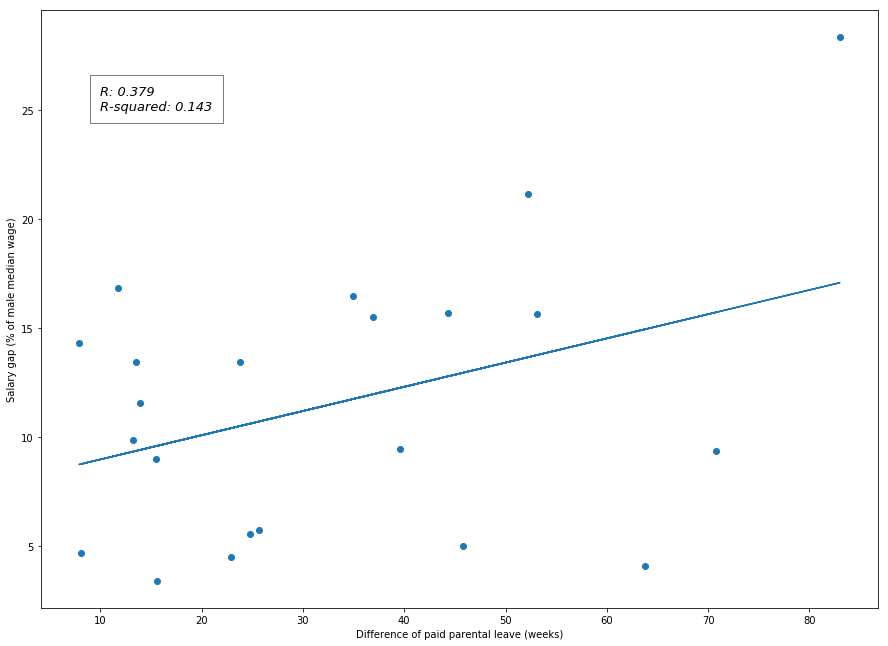

In [75]:
# First model: Median salary gap regressed against difference of paid leave. No meaningful correlation

FinalDFOECD["Intercept"]=1#add an intercept

modelDeltaMedian = sm.OLS(endog=FinalDFOECD["MedianSalGap"], exog=FinalDFOECD[["DeltaPaidLeave","Intercept"]])
resultsmodelDeltaMedian = modelDeltaMedian.fit()
display(resultsmodelDeltaMedian.summary())

#scatterplot
plt.scatter(FinalDFOECD.DeltaPaidLeave,FinalDFOECD.MedianSalGap)
slope0, intercept0 = np.polyfit(FinalDFOECD.DeltaPaidLeave, FinalDFOECD.MedianSalGap, 1)
plt.plot(FinalDFOECD.DeltaPaidLeave,FinalDFOECD.DeltaPaidLeave*slope0 + intercept0)


CorrDeltaMedian=np.corrcoef(FinalDFOECD["MedianSalGap"],FinalDFOECD["DeltaPaidLeave"])[0,1].round(3).astype(float)
RSqDeltaMedian= resultsmodelDeltaMedian.rsquared.round(3)
#plt.title("Salary gap vs difference of paid parental leave", loc='center', fontsize=12, fontweight=0, color='blue')
plt.ylabel("Salary gap (% of male median wage)")
plt.xlabel("Difference of paid parental leave (weeks)")

plt.text(10,25, "R: " + str(CorrDeltaMedian) + "\nR-squared: " + str(RSqDeltaMedian),style='italic', size= 13,
   bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MedianSalGap   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.723
Date:                Fri, 20 Jul 2018   Prob (F-statistic):             0.0680
Time:                        19:55:05   Log-Likelihood:                -69.410
No. Observations:                  22   AIC:                             142.8
Df Residuals:                      20   BIC:                             145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid     0.1208      0.063      1.929      0.068      -0.010       0.251
Intercept          7.1052      2.603      2.730      0.013       1.676      12.535
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.711
Skew:                          -0.035   Prob(JB):                        0.701
Kurtosis:                       2.122   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

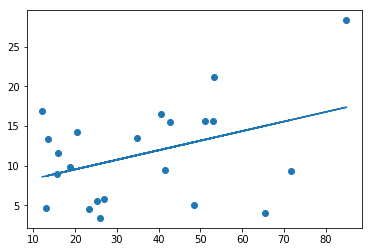

In [19]:
# Second model: Median salary gap regressed against Mother's paid leave. No meaningful correlation

modelMothersMedian = sm.OLS(endog=FinalDFOECD["MedianSalGap"], exog=FinalDFOECD[["MothersTotPaid","Intercept"]])
resultsmodelMothersMedian = modelMothersMedian.fit()
display(resultsmodelMothersMedian.summary())

#scatterplot
plt.scatter(FinalDFOECD.MothersTotPaid,FinalDFOECD.MedianSalGap)
slope1, intercept1 = np.polyfit(FinalDFOECD.MothersTotPaid, FinalDFOECD.MedianSalGap, 1)
plt.plot(FinalDFOECD.MothersTotPaid,FinalDFOECD.MothersTotPaid*slope1 + intercept1)

In [20]:
# Third model. Median salary gap regressed against Mother's paid leave and father's paid leave. No meaningful correlation

modelMathFathGapOECD = sm.OLS(endog=FinalDFOECD["MedianSalGap"], exog=FinalDFOECD[["MothersTotPaid","FathersTotPaid","Intercept"]])

resultsmodelMathFathGapOECD = modelMathFathGapOECD.fit()
display(resultsmodelMathFathGapOECD.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MedianSalGap   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.826
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.188
Time:                        19:56:07   Log-Likelihood:                -69.354
No. Observations:                  22   AIC:                             144.7
Df Residuals:                      19   BIC:                             148.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid     0.1233      0.065      1.909      0.071      -0.012       0.258
FathersTotPaid     0.1095      0.352      0.311      0.759      -0.628       0.847
Intercept          6.6271      3.076      2.155      0.044       0.190      13.065
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.598
Skew:                          -0.002   Prob(JB):                        0.742
Kurtosis:                       2.192   Cond. No.                         98.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2835
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.600
Time:                        20:00:31   Log-Likelihood:                 29.976
No. Observations:                  24   AIC:                            -55.95
Df Residuals:                      22   BIC:                            -53.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DeltaPaidLeave    -0.0004      0.001     -0.532      0.600      -0.002       0.001
Intercept          0.8198      0.026     31.004      0.000       0.765       0.875
==============================================================================
Omnibus:                        7.304   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.214
Skew:                          -0.871   Prob(JB):                       0.0738
Kurtosis:                       4.476   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

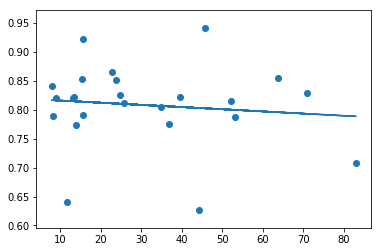

In [22]:
###ILO
# Fourth model. Ratio of mean wages regressed against difference of paid leave, for all occupations. no correlation


DFILOTot=FinalDFILO[FinalDFILO["Occupation"]=="TOTAL. Total (ISCO-08)"]
DFILOTot["Intercept"]=1

modelDeltaMedianILO = sm.OLS(endog=DFILOTot["ratioMeanWage"], exog=DFILOTot[["DeltaPaidLeave","Intercept"]])
resultsmodelDeltaMedianILO = modelDeltaMedianILO.fit()
display(resultsmodelDeltaMedianILO.summary())

plt.scatter(DFILOTot.DeltaPaidLeave,DFILOTot.ratioMeanWage)
slope2, intercept2 = np.polyfit(DFILOTot.DeltaPaidLeave, DFILOTot.ratioMeanWage, 1)
plt.plot(DFILOTot.DeltaPaidLeave, DFILOTot.DeltaPaidLeave*slope2 + intercept2)




In [24]:
#Fifth model. Ratio of mean wages regressed against mothers paid leave and fathers paid leave, for all occupations. no correlation

modelMothFathMedianILO = sm.OLS(endog=DFILOTot["ratioMeanWage"], exog=DFILOTot[["MothersTotPaid","FathersTotPaid","Intercept"]])
resultsmodelMothFathMedianILO = modelMothFathMedianILO.fit()
display(resultsmodelMothFathMedianILO.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.2547
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.778
Time:                        20:01:39   Log-Likelihood:                 30.110
No. Observations:                  24   AIC:                            -54.22
Df Residuals:                      21   BIC:                            -50.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid    -0.0003      0.001     -0.411      0.685      -0.002       0.001
FathersTotPaid     0.0023      0.004      0.570      0.575      -0.006       0.011
Intercept          0.8109      0.033     24.883      0.000       0.743       0.879
==============================================================================
Omnibus:                        8.214   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.161
Skew:                          -0.954   Prob(JB):                       0.0459
Kurtosis:                       4.587   Cond. No.                         86.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.5054
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.485
Time:                        20:03:42   Log-Likelihood:                 20.043
No. Observations:                  24   AIC:                            -36.09
Df Residuals:                      22   BIC:                            -33.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DeltaPaidLeave     0.0008      0.001      0.711      0.485      -0.001       0.003
Intercept          0.7870      0.040     19.678      0.000       0.704       0.870
==============================================================================
Omnibus:                        5.618   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.905
Skew:                          -0.962   Prob(JB):                        0.142
Kurtosis:                       3.449   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

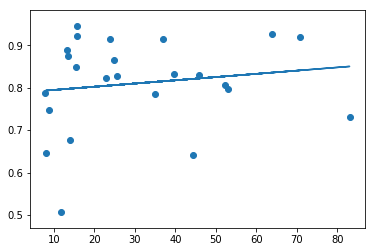

In [26]:
#Sixth Model (same as fourth, but for elementary occupations). no correlation

DFILOElem=FinalDFILO[FinalDFILO["Occupation"]=="9. Elementary occupations (ISCO-08)"]
DFILOElem["Intercept"]=1

modelDeltaMedianILOElem = sm.OLS(endog=DFILOElem["ratioMeanWage"], exog=DFILOElem[["DeltaPaidLeave","Intercept"]])
resultsmodelDeltaMedianILOElem = modelDeltaMedianILOElem.fit()
display(resultsmodelDeltaMedianILOElem.summary())


plt.scatter(DFILOElem.DeltaPaidLeave,DFILOElem.ratioMeanWage)
slope3, intercept3 = np.polyfit(DFILOElem.DeltaPaidLeave, DFILOElem.ratioMeanWage, 1)
plt.plot(DFILOElem.DeltaPaidLeave, DFILOElem.DeltaPaidLeave*slope3 + intercept3)

In [27]:
#seventh model. Like fifth, but with elementary occupations. No correlation.


modelMothFathMedianILOElem=sm.OLS(endog=DFILOElem["ratioMeanWage"], exog=DFILOElem[["MothersTotPaid","FathersTotPaid","Intercept"]])
resultsmodelMothFathMedianILOElem = modelMothFathMedianILOElem.fit()
display(resultsmodelMothFathMedianILOElem.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.4020
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.674
Time:                        20:04:48   Log-Likelihood:                 20.221
No. Observations:                  24   AIC:                            -34.44
Df Residuals:                      21   BIC:                            -30.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid     0.0009      0.001      0.801      0.432      -0.001       0.003
FathersTotPaid     0.0027      0.006      0.429      0.672      -0.010       0.016
Intercept          0.7715      0.049     15.680      0.000       0.669       0.874
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.667
Skew:                          -0.947   Prob(JB):                        0.160
Kurtosis:                       3.280   Cond. No.                         86.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Eigth model. Same as fourth, with managers. No correlation

DFILOMan=FinalDFILO[FinalDFILO["Occupation"]=="1. Managers (ISCO-08)"]

DFILOMan["Intercept"]=1

modelDeltaMedianILOMan = sm.OLS(endog=DFILOMan["ratioMeanWage"], exog=DFILOMan[["DeltaPaidLeave","Intercept"]])
resultsmodelDeltaMedianILOMan = modelDeltaMedianILOMan.fit()
display(resultsmodelDeltaMedianILOMan.summary())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.4001
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.534
Time:                        20:06:47   Log-Likelihood:                 25.684
No. Observations:                  24   AIC:                            -47.37
Df Residuals:                      22   BIC:                            -45.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DeltaPaidLeave    -0.0005      0.001     -0.633      0.534      -0.002       0.001
Intercept          0.7949      0.032     25.140      0.000       0.729       0.860
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                0.797
Skew:                           0.248   Prob(JB):                        0.671
Kurtosis:                       3.742   Cond. No.                         67.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Ninth model. Same as fifth, but with managers. No correlation.

modelMothFathMedianILOMan=sm.OLS(endog=DFILOMan["ratioMeanWage"], exog=DFILOMan[["MothersTotPaid","FathersTotPaid","Intercept"]])
resultsmodelMothFathMedianILOMan = modelMothFathMedianILOMan.fit()
display(resultsmodelMothFathMedianILOMan.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.2120
Date:                Fri, 20 Jul 2018   Prob (F-statistic):              0.811
Time:                        20:07:17   Log-Likelihood:                 25.708
No. Observations:                  24   AIC:                            -45.42
Df Residuals:                      21   BIC:                            -41.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid    -0.0006      0.001     -0.647      0.524      -0.002       0.001
FathersTotPaid    -0.0005      0.005     -0.092      0.928      -0.011       0.010
Intercept          0.7994      0.039     20.420      0.000       0.718       0.881
==============================================================================
Omnibus:                        1.889   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                0.648
Skew:                           0.243   Prob(JB):                        0.723
Kurtosis:                       3.642   Cond. No.                         86.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratioMeanWage   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1907
Date:                Sat, 21 Jul 2018   Prob (F-statistic):              0.667
Time:                        17:05:54   Log-Likelihood:                 29.926
No. Observations:                  24   AIC:                            -55.85
Df Residuals:                      22   BIC:                            -53.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid    -0.0003      0.001     -0.437      0.667      -0.002       0.001
Intercept          0.8190      0.029     28.352      0.000       0.759       0.879
==============================================================================
Omnibus:                        7.138   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.032
Skew:                          -0.862   Prob(JB):                       0.0808
Kurtosis:                       4.435   Cond. No.                         77.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(10,0.925,'R: -0.093\nR-squared: 0.009')

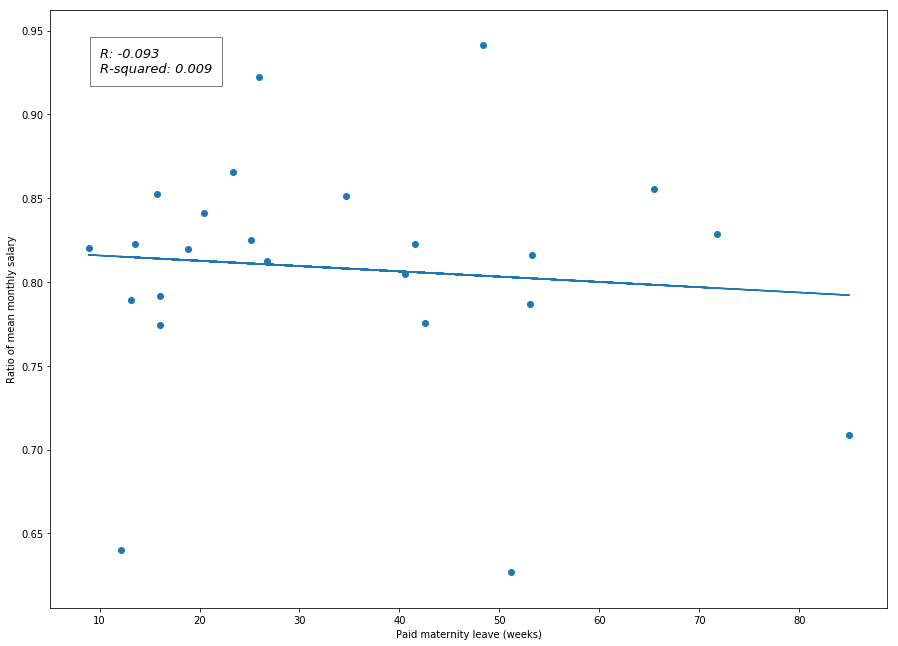

In [77]:
modelMothersMedianILO = sm.OLS(endog=DFILOTot["ratioMeanWage"], exog=DFILOTot[["MothersTotPaid","Intercept"]])
resultsmodelMothersMedianILO = modelMothersMedianILO.fit()
display(resultsmodelMothersMedianILO.summary())

plt.scatter(DFILOTot.MothersTotPaid,DFILOTot.ratioMeanWage)
slope6, intercept6 = np.polyfit(DFILOTot.MothersTotPaid, DFILOTot.ratioMeanWage, 1)
plt.plot(DFILOTot.MothersTotPaid, DFILOTot.MothersTotPaid*slope6 + intercept6)

CorrMothMed=np.corrcoef(DFILOTot["ratioMeanWage"],DFILOTot["MothersTotPaid"])[0,1].round(3).astype(float)
RSq=resultsmodelMothersMedianILOILO.rsquared.round(3)

#plt.title("Ratio of mean monthly salary vs paid mathernity leave", loc='center', fontsize=12, fontweight=0, color='blue')
plt.ylabel("Ratio of mean monthly salary")
plt.xlabel("Paid maternity leave (weeks)")
plt.text(10,.925, "R: " + str(CorrMothMed) + "\nR-squared: " + str(RSq),style='italic', size= 13,
   bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})